In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from astropy.io import fits 
from astropy.table import Table 
from matplotlib.colors import LogNorm 
from astropy.utils.data import download_file

In [2]:
event_RW4T= '/Users/kate/Desktop/Summer work/kepler data and notebooks/kplr_anc-eng_TH1RW4T.fits'
hdul=fits.open(event_RW4T, mmemmap=True)

In [3]:
table_hdu=hdul[1]
df=pd.DataFrame(table_hdu.data)
print(df.head())

            MJD                      UTC     LC   SC   TH1RW4T
0  54949.283051  2009-04-28T06:47:35.600  384.0  1.0  7.548307
1  54949.283120  2009-04-28T06:47:41.600  384.0  1.0  7.548307
2  54949.283722  2009-04-28T06:48:33.600  384.0  2.0  7.548307
3  54949.284394  2009-04-28T06:49:31.600  384.0  3.0  7.548307
4  54949.284486  2009-04-28T06:49:39.600  384.0  3.0  7.548307


In [4]:
evt_data=Table(hdul[1].data)
evt_data

MJD,UTC,LC,SC,TH1RW4T
float64,str23,float64,float64,float64
54949.283050925995,2009-04-28T06:47:35.600,384.0,1.0,7.5483072510342595
54949.28312037,2009-04-28T06:47:41.600,384.0,1.0,7.5483072510342595
54949.283722222004,2009-04-28T06:48:33.600,384.0,2.0,7.5483072510342595
54949.284393519,2009-04-28T06:49:31.600,384.0,3.0,7.5483072510342595
54949.284486111,2009-04-28T06:49:39.600,384.0,3.0,7.5483072510342595
54949.285064722004,2009-04-28T06:50:29.592,384.0,4.0,7.5483072510342595
54949.28573611099,2009-04-28T06:51:27.600,384.0,5.0,7.5483072510342595
54949.285851852,2009-04-28T06:51:37.600,384.0,6.0,7.5483072510342595
54949.286407407,2009-04-28T06:52:25.600,384.0,6.0,7.5483072510342595


In [5]:
from astropy.timeseries import LombScargle

In [6]:
import datetime
from datetime import datetime

In [7]:
df['UTC']=pd.to_datetime(df['UTC'])

In [8]:
print(df)

                  MJD                     UTC       LC         SC    TH1RW4T
0        54949.283051 2009-04-28 06:47:35.600    384.0        1.0   7.548307
1        54949.283120 2009-04-28 06:47:41.600    384.0        1.0   7.548307
2        54949.283722 2009-04-28 06:48:33.600    384.0        2.0   7.548307
3        54949.284394 2009-04-28 06:49:31.600    384.0        3.0   7.548307
4        54949.284486 2009-04-28 06:49:39.600    384.0        3.0   7.548307
...               ...                     ...      ...        ...        ...
2419510  56728.010050 2014-03-12 00:14:28.349  87433.0  2611475.0  20.743373
2419511  56728.010722 2014-03-12 00:15:26.349  87433.0  2611476.0  20.743373
2419512  56728.011393 2014-03-12 00:16:24.340  87433.0  2611477.0  20.743373
2419513  56728.012064 2014-03-12 00:17:22.340  87433.0  2611478.0  20.743373
2419514  56728.012735 2014-03-12 00:18:20.340  87433.0  2611479.0  20.743373

[2419515 rows x 5 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419515 entries, 0 to 2419514
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   MJD      float64       
 1   UTC      datetime64[ns]
 2   LC       float64       
 3   SC       float64       
 4   TH1RW4T  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 92.3 MB


In [10]:
full_2010 = df[df['UTC'].dt.year == 2010]

In [11]:
print(full_2010)

                 MJD                     UTC       LC        SC    TH1RW4T
403024  55197.000229 2010-01-01 00:00:19.812  12507.0  363692.0  17.524428
403025  55197.000901 2010-01-01 00:01:17.812  12507.0  363693.0  17.524428
403026  55197.001572 2010-01-01 00:02:15.812  12507.0  363694.0  17.524428
403027  55197.002243 2010-01-01 00:03:13.812  12507.0  363695.0  17.524428
403028  55197.002914 2010-01-01 00:04:11.812  12507.0  363696.0  17.524428
...              ...                     ...      ...       ...        ...
962599  55561.996869 2010-12-31 23:55:29.518  30370.0  899570.0  20.743373
962600  55561.997541 2010-12-31 23:56:27.518  30370.0  899571.0  20.743373
962601  55561.998212 2010-12-31 23:57:25.518  30370.0  899572.0  20.743373
962602  55561.998883 2010-12-31 23:58:23.518  30370.0  899573.0  20.743373
962603  55561.999555 2010-12-31 23:59:21.518  30370.0  899574.0  20.743373

[559580 rows x 5 columns]


In [12]:
time = full_2010['MJD']*86400

In [13]:
y = full_2010['TH1RW4T']

In [14]:
frequency, power = LombScargle(time, y).autopower()

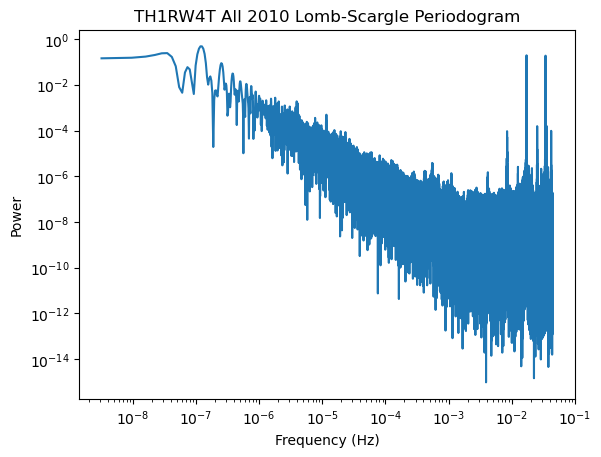

In [16]:
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('TH1RW4T All 2010 Lomb-Scargle Periodogram')
plt.show()